## Classification

In [13]:
import csv
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
f = open('cities.csv','rU')
cities = pd.read_csv(f)
cats = []
for i in range(len(cities)):
    if cities.loc[i]['temperature'] < 5:
        cats.append('cold')
    elif cities.loc[i]['temperature'] < 9:
        cats.append('cool')
    elif cities.loc[i]['temperature'] < 15:
        cats.append('warm')
    else: cats.append('hot')
cities['category'] = cats
print ("cold:", len(cities[(cities.category == 'cold')]))
print ("cool:", len(cities[(cities.category == 'cool')]))
print ("warm:", len(cities[(cities.category == 'warm')]))
print ("hot:", len(cities[(cities.category == 'hot')]))

cold: 17
cool: 92
warm: 79
hot: 25


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [18]:
numitems = len(cities)
percenttrain = 0.85
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print ('Training set', numtrain, 'items')
print ('Test set', numtest, 'items')
citiesTrain = cities[0:numtrain]
citiesTest = cities[numtrain:]

Training set 181 items
Test set 32 items


In [19]:
cities.head()

,city,country,latitude,longitude,temperature,category
0,Aalborg,Denmark,57.03,9.92,7.52,cool
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,cool
2,Abisko,Sweden,63.35,18.83,0.20,cold
3,Adana,Turkey,36.99,35.32,18.67,hot
4,Albacete,Spain,39.00,-1.87,12.62,warm


## K- Nearest Neighbor

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. 

Supervisado: esto -brevemente- quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada una fila de datos.
Basado en Instancia: Esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como base de conocimiento para la fase de predicción.

Se aplica en sistemas de recomendación, búsqueda semántica y detección de anomalías.

Como pros tiene sobre todo que es sencillo de aprender e implementar. Tiene como contras que utiliza todo el dataset para entrenar cada punto y por eso requiere uso de mucha memoria y recursos de procesamiento (CPU). Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features (las columnas).

In [25]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
neighbors = 6
classifier = KNeighborsClassifier(neighbors)
classifier.fit(citiesTrain[features], citiesTrain['category'])
predictions = classifier.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category'])
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))
# Comment out print, try other values for neighbors, other features
#correctos / len (num test)

Predicted: warm  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: cold  Actual: cold
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: hot  Actual: hot
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: cool  Actual: cold
Predicted: hot  Actual: hot
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Accuracy: 0.8125


### Players example

In [28]:
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# This cell does all the set-up, including reordering the data to avoid team bias.
f = open('players.csv','rU')
players = pd.read_csv(f)
players = players.sort_values(by='surname')
players = players.reset_index(drop=True)
numitems = len(players)
percenttrain = 0.95
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print ('Training set', numtrain, 'items')
print ('Test set', numtest, 'items')
playersTrain = players[0:numtrain]
playersTest = players[numtrain:]

Training set 565 items
Test set 30 items


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
players.head()

,surname,team,position,minutes,shots,passes,tackles,saves,Unnamed: 8
0,Abdoun,Algeria,midfielder,16,0,6,0,0,NaN
1,Abe,Japan,midfielder,351,0,101,14,0,NaN
2,Abidal,France,defender,180,0,91,6,0,NaN
3,Abou Diaby,France,midfielder,270,1,111,5,0,NaN
4,Aboubakar,Cameroon,forward,46,2,16,0,0,NaN


In [38]:
players['position'].nunique()

4

In [39]:
# This cell does the classification.
# Try different features and different numbers of neighbors.
# What's the highest accuracy you can get?
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
neighbors = 11
classifier = KNeighborsClassifier(neighbors)
classifier.fit(playersTrain[features], playersTrain['position'])
predictions = classifier.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position'])
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Predicted: forward  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: forward  Actual: forward
Predicted: midfielder  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: forward  Actual: defender
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: defender
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: midfielder  Actu

## Decision tree classification

Aprendizaje basado en árboles de decisión es un método comúnmente utilizado en la minería de datos.
 - El objetivo es crear un modelo que predice el valor de una variable de destino en función de diversas variables de entrada.
 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [43]:
# Predict temperature category from other features
features = ['longitude','latitude']
#The minimum number of samples required to split an internal node:
split = 5
dt = DecisionTreeClassifier(min_samples_split=split) # parameter is optional 
dt.fit(citiesTrain[features],citiesTrain['category'])
predictions = dt.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category'])
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))
# Try other values for split, other features

Predicted: warm  Actual: cool
Predicted: hot  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cold  Actual: cool
Predicted: cold  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: hot  Actual: warm
Predicted: cool  Actual: cold
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: hot
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: hot  Actual: hot
Predicted: warm  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Accuracy: 0.6875


## Random Forest

Es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [47]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
#The number of trees in the forest.
trees = 10
rf = RandomForestClassifier(n_estimators=trees)
rf.fit(citiesTrain[features],citiesTrain['category'])
predictions = rf.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category'])
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))
# Try other values for trees

Predicted: cool  Actual: cool
Predicted: hot  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cold  Actual: cool
Predicted: cold  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: hot  Actual: hot
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: warm  Actual: hot
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Accuracy: 0.84375


In [51]:
# SINGLE TREE
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# Try different features and different values for min_samples_split.
# What's the highest accuracy you can get?
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
split = 10
dt = DecisionTreeClassifier(min_samples_split=split) # parameter is optional
dt.fit(playersTrain[features],playersTrain['position'])
predictions = dt.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position'])
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Predicted: midfielder  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: forward  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: forward  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: midfielder  Actual: forward
Predicted: midfielder  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: midfielder  Actual: defender
Predicted: midfielder  Actual: defender
Predicted: midfielder  Actual: defender
Predicted: forward  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: midfiel

In [52]:
# FOREST OF TREES
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# Try different values for n_estimators.
# What's the highest accuracy you can get?
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
trees = 10
rf = RandomForestClassifier(n_estimators=trees)
rf.fit(playersTrain[features],playersTrain['position'])
predictions = rf.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position'])
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Predicted: midfielder  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: forward  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: forward  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: forward  Actual: forward
Predicted: midfielder  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: defender
Predicted: defender  Actual: defender
Predicted: forward  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: defender  Actu

## Naive Bayes classification

Es una técnica de clasificación basada en el Teorema de Bayes con un supuesto de independencia entre los predictores. En términos simples, un clasificador Naive Bayes supone que la presencia de una característica particular en una clase no está relacionada con la presencia de ninguna otra característica.

Por ejemplo, una fruta puede considerarse una manzana si es roja, redonda y de aproximadamente 3 pulgadas de diámetro. Incluso si estas características dependen unas de otras o de la existencia de otras características, todas estas propiedades contribuyen independientemente a la probabilidad de que esta fruta sea una manzana y es por eso que se conoce como "Naive".

Junto con la simplicidad, se sabe que Naive Bayes supera incluso a los métodos de clasificación altamente sofisticados.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [55]:
features = ['longitude', 'latitude']
nb = GaussianNB()
nb.fit(citiesTrain[features],citiesTrain['category'])
predictions = nb.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category'])
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))
# Try other features

Predicted: warm  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cold  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: warm
Predicted: cool  Actual: warm
Predicted: cool  Actual: cold
Predicted: cold  Actual: cold
Predicted: hot  Actual: warm
Predicted: cool  Actual: cold
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: hot  Actual: hot
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: cold  Actual: cold
Predicted: hot  Actual: hot
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Accuracy: 0.78125


Pros:

 - Es fácil y rápido predecir la clase de conjunto de datos de entrenamiento. También funciona bien en predicciones de clases múltiples
 - Cuando se asume la independencia entre variable x, un clasificador Naive Bayes se desempeña mejor en comparación con otros modelos como la regresión logística y necesita menos datos de entrenamiento.
 - Funciona bien en el caso de variables de entrada categóricas en comparación con las variables numéricas. Para la variable numérica, se supone una distribución normal.

Contras:

 - Si la variable categórica tiene una categoría (en el conjunto de datos de entrenamiento), que no se observó en el conjunto de datos de entrenamiento, el modelo asignará una probabilidad 0 (cero) y no podrá hacer una predicción. Esto a menudo se conoce como "frecuencia cero". Para resolver esto, podemos usar la técnica de smoothness. Una de las técnicas de smoothness más simples se llama estimación de Laplace.
 - Otra limitación de Naive Bayes es la suposición de predictores independientes. En la vida real, es casi imposible que obtengamos un conjunto de predictores que sean completamente independientes.

In [57]:
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# Try different features. What's the highest accuracy you can get?
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
nb = GaussianNB()
nb.fit(playersTrain[features],playersTrain['position'])
predictions = nb.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position'])
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Predicted: defender  Actual: defender
Predicted: forward  Actual: forward
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: forward  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: forward  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: defender  Actual: defender
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: midfield

In [58]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)

In [59]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [62]:
df['species'].nunique

<bound method IndexOpsMixin.nunique of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    vi

In [63]:
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [64]:
print('Observaciones training data:', len(train))
print('Observaciones test data:',len(test))

Observaciones training data: 118
Observaciones test data: 32


In [65]:
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [66]:
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [67]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

ENTRENADOOO!!!!

In [68]:
####QUE HIZOOOO???
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [69]:
##que tan segurooo esta de estas predicciones???
##vamos a ver las probabilidades
clf.predict_proba(test[features])[0:20]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 0.2, 0.8],
       [0. , 0.3, 0.7],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2]])

In [70]:
preds = iris.target_names[clf.predict(test[features])]

In [71]:
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [72]:
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

Esto hasta ahora se ve muy bienn!!

In [73]:
##peroo vamos a ver toda la dataaa
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [74]:
###vamos a ver la importancia de cada feature
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]

## SVM (support vector machine)

Una máquina de vectores de soporte (SVM) es un clasificador discriminativo definido formalmente por un hiperplano de separación. En otras palabras, dados los datos de entrenamiento etiquetados (aprendizaje supervisado), el algoritmo genera un hiperplano óptimo que categoriza nuevos ejemplos. En dos espacios dimensionales, este hiperplano es una línea que divide un plano en dos partes donde en cada clase se encuentra a cada lado.

In [ ]:
#Importamos librerias que vamos a utilizar
#Manejo de la información
import numpy as np
import pandas as pd
from math import ceil, floor
#Machine Learning
from sklearn.svm import SVC
#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Esta línea se encargará de renderizar los plots en la notebook
%matplotlib inline

In [87]:
#Importamos dataframe de flores y definimos los nombres de las columnas
df_flores = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [ ]:
#Visualizamos las primeras 10 observaciones
print(df_flores.head(10))

In [ ]:
#Podemos ver aquí que hay 3 tipos de clases o tipos de flores
df_flores['Class'].unique()

In [ ]:
#Para tener una idea de con qué flores vamos a estar trabajando, las visualizaremos 
#Importamos libreria para visualizar imagenes
from IPython.display import Image,display
#Definiremos una función para visualizar las flores
def visualizarFlores():
    #Creamos un diccionario, para cada flor, su link correspondiente
    flowers = {'setosa':'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg',
               'versicolor':'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg',
               'virginica':'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'}
    #Creamos otro diccionario utilizando los mismos nombres de flores y el objeto de imagen de cada una
    images=dict(map(lambda x: (x, Image(flowers[x],width=150,height=150)), flowers.keys()))
    #Las visualizamos
    for idx in images.keys():
        print(idx)
        display(images[idx])

In [ ]:
#Mandamos llamar la función
visualizarFlores()

In [ ]:
#Podemos ver la distribución de los valores de cada variable mediante un histograma
df_flores.hist(bins=20)
plt.show()

In [ ]:
#Observamos estadísticas descriptivas de las variables
print(df_flores.describe())

In [ ]:
#En una matriz de correlaciones podemos ver qué variables están relacionadas unas con otras
print(df_flores.corr())

In [ ]:
# Con la siguiente visualización podemos ver qué características/variables conjuntas
# nos separan más las especies de flores
sns.pairplot(df_flores , hue='Class')

In [ ]:
# Podemos ver que Iris Setosa es la más separable, 
# parece que la longitud y ancho del pétalo en conjunto son variables muy relevantes.
# si regresamos a ver las imágenes de arriba, podemos ver que, en efecto, 
# la Iris Setosa tiene más diferencias con respecto  a las otras 2

In [ ]:
#Extraemos los valores del dataset y los mezclamos aleatoriamente 
valores = df_flores.values
#Estableciendo un "seed" permitirá que obtengamos los mismos datos al azar
np.random.seed(90) #Comentar esta línea si deseas probar con diferentes resultados al azar
np.random.shuffle(valores)

In [ ]:
#Realizamos un split del dataset, construimos un set de entrenamiento y otro de testing
#Utilizaremos el 75% de los datos para entrenar y probaremos con el 25% restante
pTrain = 75
n_train= floor((pTrain/100) * len(valores))
#utilizamos la función floor para obtener el valor "entero" inferior más cercano
n_test = len(valores) - n_train

#Únicamente las primeras 3 columnas (sin la variable que queremos predecir)
X_train = valores[:n_train][:,0:4]
X_test = valores[-n_test:][:,0:4]
#Únicamente la variable categórica
Y_train = valores[:n_train][:,4] 
Y_test = valores[-n_test:][:,4]

In [ ]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train,Y_train)

predicciones = svc.predict(X_test)

In [ ]:
#Veamos el desempeño del algoritmo
predicciones

In [ ]:
#Y lo comparamos con el real
Y_test

In [ ]:
#Podemos hacer una lista para ver si hubo casos en los que el algoritmo no predijo la clase correcta
prediccionesFallidas=[Y_test!=predicciones]
prediccionesFallidas

In [ ]:
#El 6to caso fue el único que no le atinamos, para sacar la cuenta basta con realizar lo siguiente:
np.sum(prediccionesFallidas)

In [ ]:
#Podemos ver la exactitud de nuestro algoritmo de la siguiente manera:
print("Exactitud:", 100 * svc.score(X_test,Y_test), "%")

In [ ]:
#Excelente! obtuvimos 97% de exactitud! Este modelo parece funcionar muy bien!

In [ ]:
#Podemos generar una matriz de confusión para ver los resultados
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,predicciones))

In [ ]:
print(classification_report(Y_test,predicciones))

In [ ]:
# El modelo funcionó bien, debido a que el problema fue linealmente separable,
# teníamos buena calidad de datos y eran menos variables que cantidad de registros
#bajo estas condiciones el algoritmo SVM funciona bien

## K- Means (clustering)
Es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características.

In [75]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
iris = datasets.load_iris()
iris.data
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

Text(0.5, 1.0, 'Petal Length vs Petal Width')

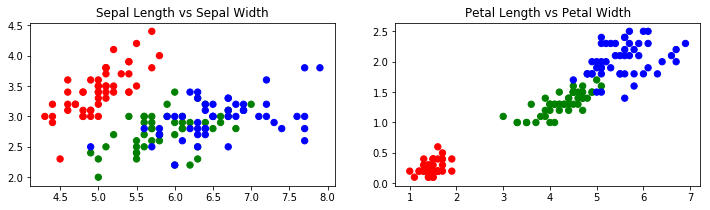

In [78]:
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']], s=40)
plt.title('Petal Length vs Petal Width')

In [79]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, "Model's classification")

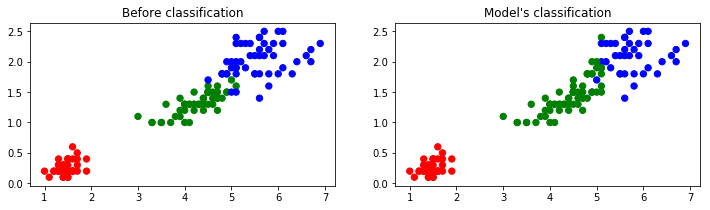

In [81]:
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=40)
plt.title('Before classification')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=40)
plt.title("Model's classification")

In [88]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
%matplotlib inline

In [89]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU')
cities = pd.read_csv(f)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


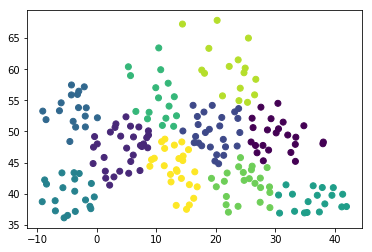

In [90]:
# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
# Try different values for K

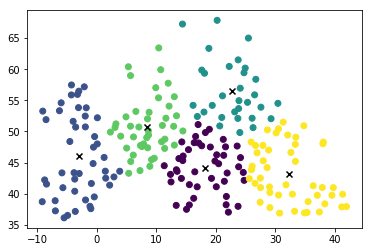

In [91]:
# Now with centroids
kmeans = cluster.KMeans(5)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

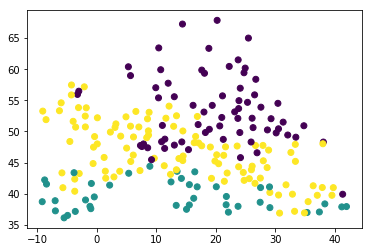

[[ 5.87705882]
 [15.14439024]
 [ 9.63923077]]


In [93]:
# k-means clustering based on temperature
kmeans = cluster.KMeans(3)
kmeans.fit(cities[['temperature']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
print (centroids)

In [94]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


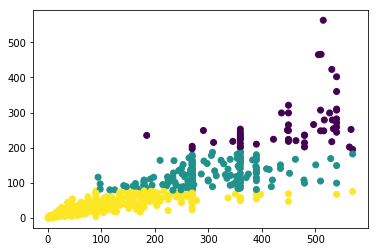

In [97]:
# Create a clustering from the Players data and show it
# visually in a scatterplot. No need for centroids.
kmeans = cluster.KMeans(3)
kmeans.fit(players[['tackles','passes']])
labels = kmeans.labels_
plt.scatter(players['minutes'], players['passes'], c=labels)
plt.show()

## Optimization

### Cross-Validation

Normalmente en un proceso de aprendizaje automático, los datos se dividen en conjuntos de entrenamiento y test; el conjunto de entrenamiento se usa para entrenar el modelo y el conjunto de prueba se usa para evaluar el rendimiento de un modelo. Sin embargo, este enfoque puede conducir a problemas de varianza. En palabras más simples, un problema de varianza se refiere al escenario en el que nuestra precisión obtenida en una prueba es muy diferente a la precisión obtenida en otro conjunto de pruebas usando el mismo algoritmo.

La solución a este problema es usar K-Fold Cross-Validation para la evaluación del rendimiento donde K es cualquier número. El proceso de Cros Validations es sencillo. Divide los datos en K pliegues. Fuera de los pliegues K, los conjuntos K-1 se usan para entrenamiento mientras que el conjunto restante se usa para pruebas/test. El algoritmo se entrena y se prueba K veces, cada vez que se usa un nuevo conjunto como conjunto de prueba, mientras que los conjuntos restantes se usan para el entrenamiento. Finalmente, el resultado de la validación cruzada K-Fold es el promedio de los resultados obtenidos en cada conjunto.

In [133]:
import pandas as pd
import numpy as np

In [134]:
dataset = pd.read_csv("winequalityreds.csv")

In [135]:
dataset.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [152]:
#Since we are doing cross validation no need to split it friend
X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 12].values

In [154]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=0)

In [156]:
y_train

array([6, 5, 7, ..., 6, 6, 5], dtype=int64)

In [157]:
#estandarizamos
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
#X_test = feature_scaler.transform(X_test)

In [158]:
#we run the model i chose, RF because you already learn it!
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [159]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [160]:
#lets see all accuracies of my 5 cvs
print(all_accuracies)

[0.71428571 0.68535826 0.70716511 0.68238994 0.68454259]


In [161]:
#mean of the accuracies
print(all_accuracies.mean())

0.6947483205258805


In [162]:
print(all_accuracies.std())

0.013273630675169781


In [ ]:
#El resultado es: 0.01572 que es 1.57%. Esto es extremadamente bajo, lo que significa que nuestro modelo 
#tiene una varianza muy baja, lo que en realidad es muy bueno, ya que eso significa que la predicción que 
#obtuvimos en un conjunto de prueba no es casual.
#Por el contrario, el modelo tendrá un rendimiento más o menos similar en todos los conjuntos de prueba.

### Grid Search

Un modelo de aprendizaje automático tiene dos tipos de parámetros. El primer tipo de parámetros son los parámetros que se aprenden a través de un modelo de aprendizaje automático, mientras que el segundo tipo de parámetros son los hiperparámetros que pasamos al modelo de aprendizaje automático.

Normalmente establecemos al azar el valor de estos hiperparámetros y vemos qué parámetros dan como resultado el mejor rendimiento. Sin embargo, la selección aleatoria de los parámetros para el algoritmo puede ser exhaustiva.

Además, no es fácil comparar el rendimiento de diferentes algoritmos configurando aleatoriamente los hiperparámetros porque un algoritmo puede funcionar mejor que el otro con un conjunto diferente de parámetros. Y si se cambian los parámetros, el algoritmo puede funcionar peor que los otros algoritmos.

Por lo tanto, en lugar de seleccionar aleatoriamente los valores de los parámetros, un mejor enfoque sería desarrollar un algoritmo que encuentre automáticamente los mejores parámetros para un modelo en particular. Grid Search es uno de esos algoritmos.

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [165]:
#remeber classifer = RF model, grid param is the params we want to test
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,

                     n_jobs=-1)

In [166]:
#mayy take super long bc its running like 100 timess, 20 combos and 5cvs
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500, 800, 1000], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [167]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1000}


In [ ]:
# Already.... the result shows that the highest accuracy is achieved when the n_estimators are 1000, 
#bootstrap is True and criterion is "gini".

In [168]:
best_result = gd_sr.best_score_
print(best_result)

0.6979362101313321


In [ ]:
#The accuracy achieved is: 0.6985 of 69.85% which is only slightly better than 69.72%. 
#To improve this further, it would be good to test values for other parameters of Random Forest algorithm, 
#such as max_features, max_depth, max_leaf_nodes, etc. to see if the accuracy further improves or not.

TE TOCAA A TI

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]

array([0, 1, 0])

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [169]:
data.keys()

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')